<a href="https://colab.research.google.com/github/xmendevs/Stock-Predictive-model-ARIMA-SARIMAX-/blob/main/Time_series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis and a predictive model to forecast future AAPL stock sales using time series analysis.

Project objective:

The primary goal is to identify, analyze, and leverage historical sales patterns—including trends and seasonality—to create an accurate forecast of future performance. This will provide valuable insights for strategic decision-making, such as inventory management, marketing campaigns, and resource allocation.

The specific objectives are to:


- Plot time series data and identify Patterns

- Decompose the series into trend, seasonality and residuals using stastmodels.

- Perform  moving average smoothing and plot the results.

- Conduct Exploratory Data Analysis (EDA): Analyze the historical sales data to identify and understand underlying patterns, such as trends, seasonality, and any irregular fluctuations.

- Model Selection and Fitting: Apply appropriate time series forecasting models, such as ARIMA or SARIMAX, to the data to find the best-fitting model that accurately captures its characteristics.

- Validate Model Performance: Evaluate the chosen model's accuracy by comparing its in-sample and out-of-sample predictions with actual historical data.

- Generate and Visualize Forecasts: Use the final model to generate future sales forecasts and present them in a clear, interpretable manner for stakeholders.

## Installing necessary Libraries

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.0 MB/s eta 0:00:00


In [ ]:
# Uninstall existing versions of numpy and pmdarima
!pip uninstall numpy pmdarima -y
# Reinstall pmdarima, which will also install a compatible numpy version
!pip install pmdarima

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.1 MB/s eta 0:00:00
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 78.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >=

In [19]:
#import libraries for time series Analysis
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [20]:
#importing csv and indexing date columns
df = pd.read_csv(r'/content/Stock_Prices_Data_Set.csv')

## Data Exploration and Filtering


In [21]:
df

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


### Updating Date type & Visualization

In [22]:
#setting date ttype
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.dtypes


,0
symbol,object
date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
volume,int64


In [23]:
# Filter the DataFrame for rows where the symbol is 'AAPL'
df = df[df['symbol'] == 'AAPL'].copy()

In [24]:
df = df[['date', 'close']].copy()
df

,date,close
1,2014-01-02,79.0185
484,2014-01-03,77.2828
967,2014-01-06,77.7042
1450,2014-01-07,77.1481
1933,2014-01-08,77.6371
...,...,...
494948,2017-12-22,175.0100
495453,2017-12-26,170.5700
495958,2017-12-27,170.6000
496463,2017-12-28,171.0800


In [25]:
#set index
# Filter the DataFrame for rows where the symbol is 'AAPL'
df.set_index('date',inplace=True)
df.head()

,close
date,
2014-01-02,79.0185
2014-01-03,77.2828
2014-01-06,77.7042
2014-01-07,77.1481
2014-01-08,77.6371


In [26]:
# Group by the index (date) and resample to month end
ts= df.groupby(pd.Grouper(level=0, freq='ME')).sum()
ts.head(5)

,close
date,
2014-01-31,1612.3354
2014-02-28,1429.2871
2014-03-31,1599.6414
2014-04-30,1623.2211
2014-05-31,1809.5858


## Moving Average on AAPL Stock Data

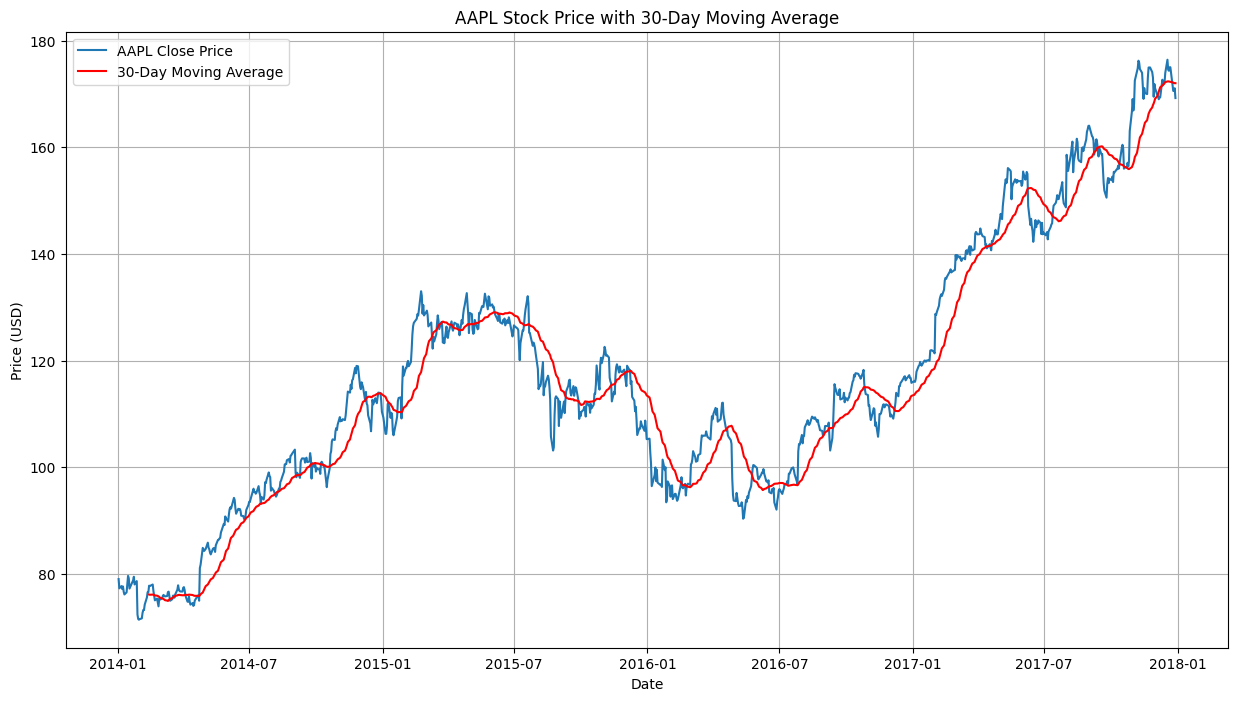

In [30]:
# Calculate a 30-day moving average on the 'close' price
df['MA_30'] = df['close'].rolling(window=30).mean()

# Plot the original data and the moving average
plt.figure(figsize=(15, 8))
plt.plot(df['close'], label='AAPL Close Price')
plt.plot(df['MA_30'], label='30-Day Moving Average', color='red')
plt.title('AAPL Stock Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

### Visualization

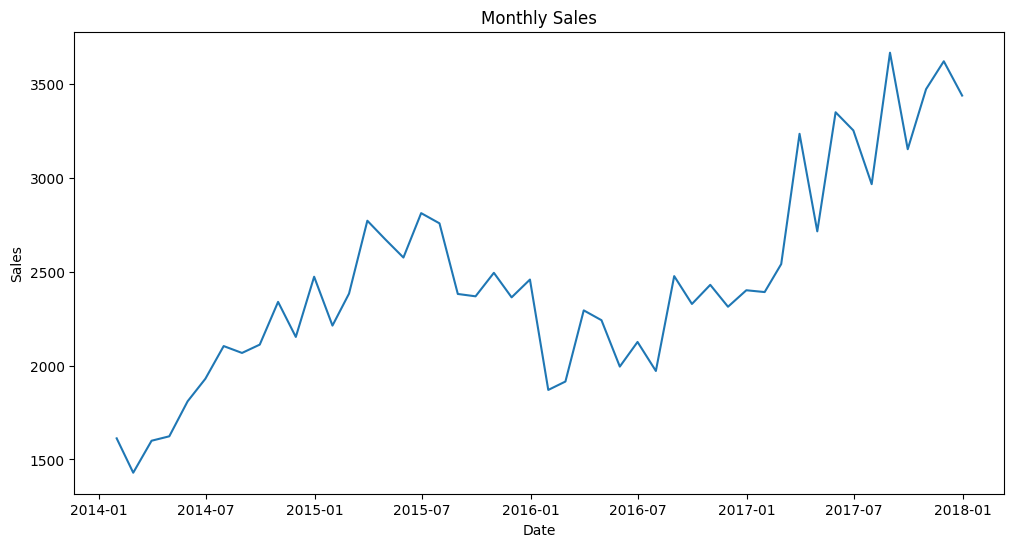

In [31]:
#plot data for monthly sales(close)
plt.figure(figsize=(12,6))
plt.grid(False)
plt.xticks(rotation=360)
plt.plot(ts)
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

## Decomposition of Data

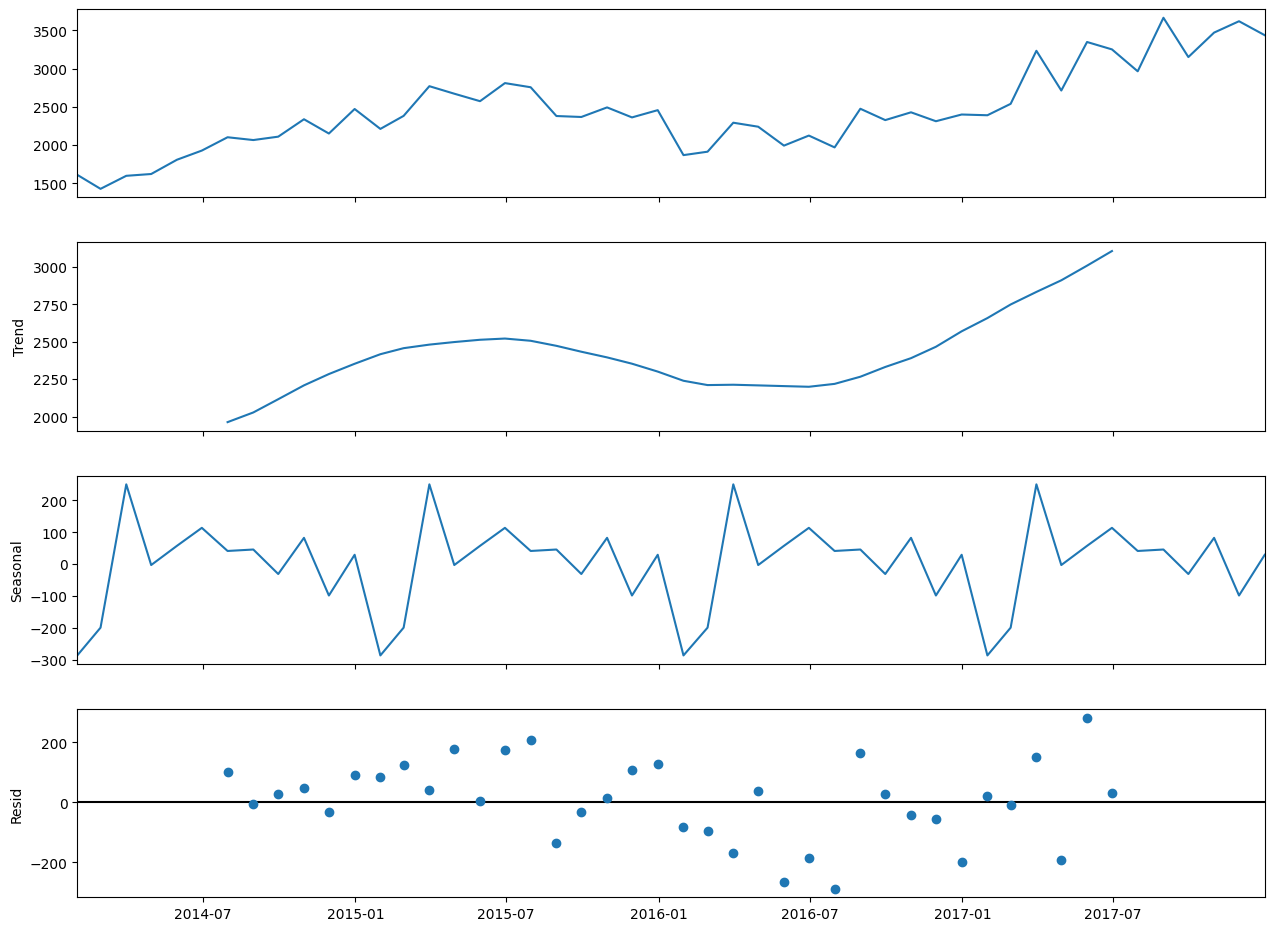

In [32]:
#decomposing the Data in trend seasonality, Residuals,
decomposition = seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14,10)
plt.show()

## Checking data for stationary

In [33]:
from statsmodels.tsa.stattools import adfuller   #using adfuller method

In [34]:
test_results = adfuller(ts['close'])

In [35]:
#checking data stationarity useing the adfuller method
def adfuller_test(close):
    result = adfuller(close)
    labels = ['ADF Test results','p-value','#Lags Used', 'No of obs used']
    for value, label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print ('data is stationary')
    else:
        print('data is non-stationary')

In [36]:
adfuller_test(ts['close']) # actual testing on the 'Close' Column

ADF Test results : -0.5923623528897136
p-value : 0.8726984996457795
#Lags Used : 2
No of obs used : 45
data is non-stationary


## Differencing due to Non-Stationary data

In [37]:
ts['First_differencing'] =  ts['close']-ts['close'].shift(1)
ts.head(15)

,close,First_differencing
date,,
2014-01-31,1612.3354,NaN
2014-02-28,1429.2871,-183.0483
2014-03-31,1599.6414,170.3543
2014-04-30,1623.2211,23.5797
2014-05-31,1809.5858,186.3647
2014-06-30,1929.5940,120.0082
2014-07-31,2103.7629,174.1689
2014-08-31,2067.1690,-36.5939
2014-09-30,2111.5200,44.3510


In [38]:
adfuller_test(ts['First_differencing'].dropna()) #adfuller test on differenced data

ADF Test results : -7.387290910717126
p-value : 8.173372594489975e-11
#Lags Used : 1
No of obs used : 45
data is stationary


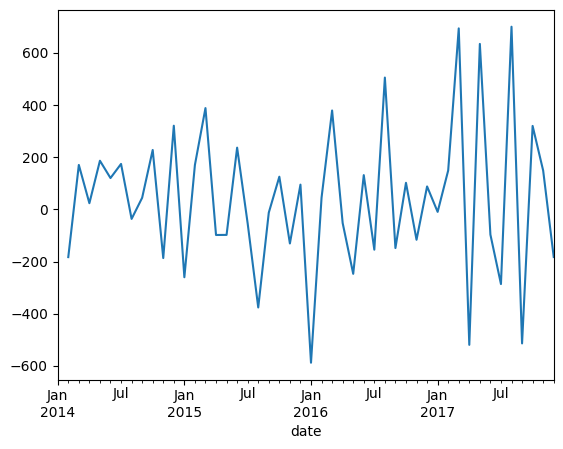

In [39]:
#checking  shifted plot
ts['First_differencing'].plot()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

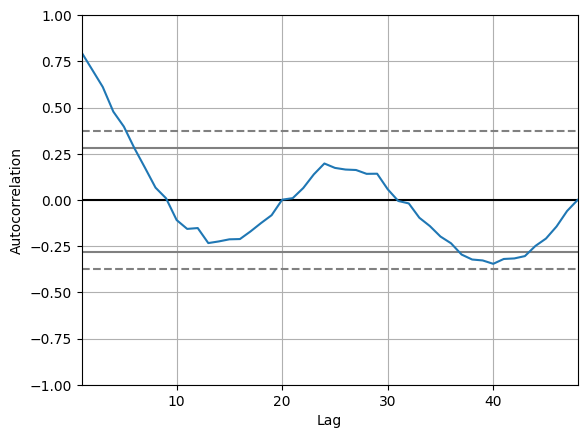

In [40]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts['close'])

## Choosing p d q p=AR d=differencing number q=Moving Average

Exploring Possible p d q using the Autocorrelation & Partial correlation Function Plot

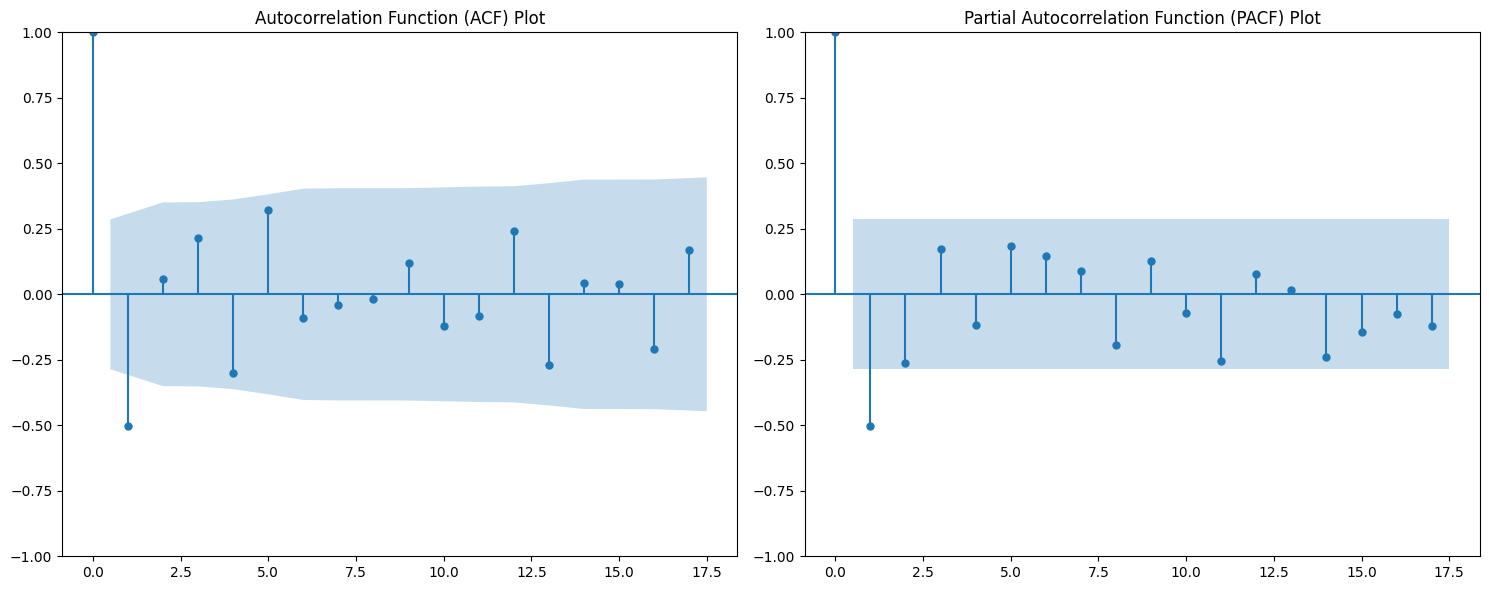

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #importing libraries

# In this case, we would use ts['First_differencing'].dropna()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the Autocorrelation Function (ACF)
plot_acf(ts['First_differencing'].dropna(), ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) Plot')

# Plot the Partial Autocorrelation Function (PACF)
plot_pacf(ts['First_differencing'].dropna(), ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF) Plot')

plt.tight_layout()
plt.show()

In [42]:
# according to the Plotds : p = 5 , d = 1 and q = 2

## Stock Price Modelling

In [43]:
#since data is non seasional we use SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

In [44]:
model=sm.tsa.statespace.SARIMAX(ts['close'],order=(5, 1, 2),seasonal_order = (0,1,0,12))
results=model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


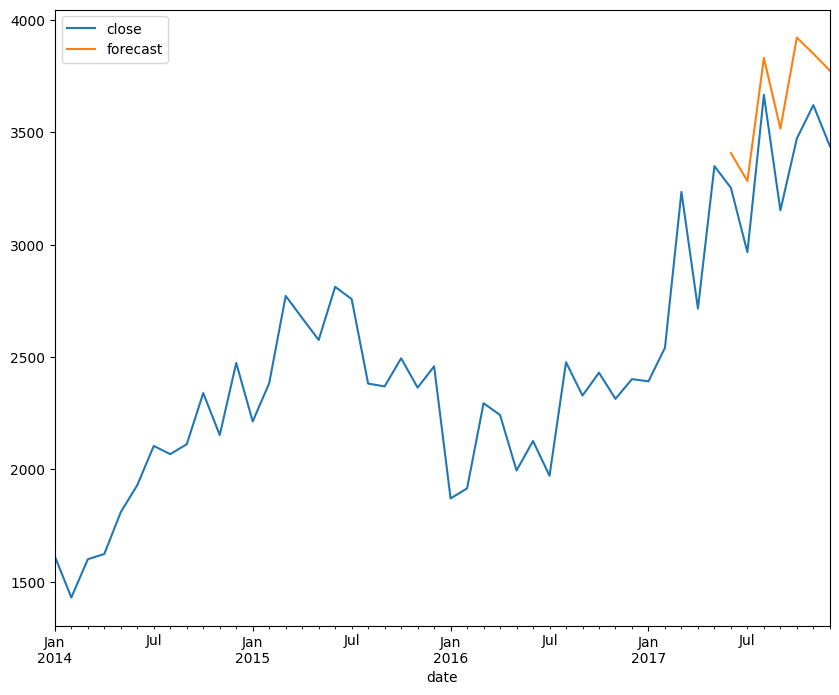

In [45]:
ts['forecast']= results.predict(start=41,end= 55, dynamic= True)
ts[['close','forecast']].plot(figsize= (10,8))
plt.show()

## Stock Forecasting 24months after

In [46]:
from pandas.tseries.offsets import DateOffset

# Use months instead of month to add months to the date
# This will correctly increment months without causing invalid month numbers
Future_dates = [ts.index[-1] + DateOffset(months=x)for x in range(0, 24)]

In [47]:
future_data_df = pd.DataFrame(index=Future_dates[1:],columns=ts.columns)

In [48]:
future_data_df.head()

,close,First_differencing,forecast
2018-01-31,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN
2018-05-31,NaN,NaN,NaN


In [49]:
#future_df= pd.concat([ts,future_data_df])

# Drop columns from future_data_df that are entirely NaN
future_data_df_cleaned = future_data_df.dropna(axis=1, how='all')

# Now, concatenate with the cleaned DataFrame
future_df = pd.concat([ts, future_data_df_cleaned])

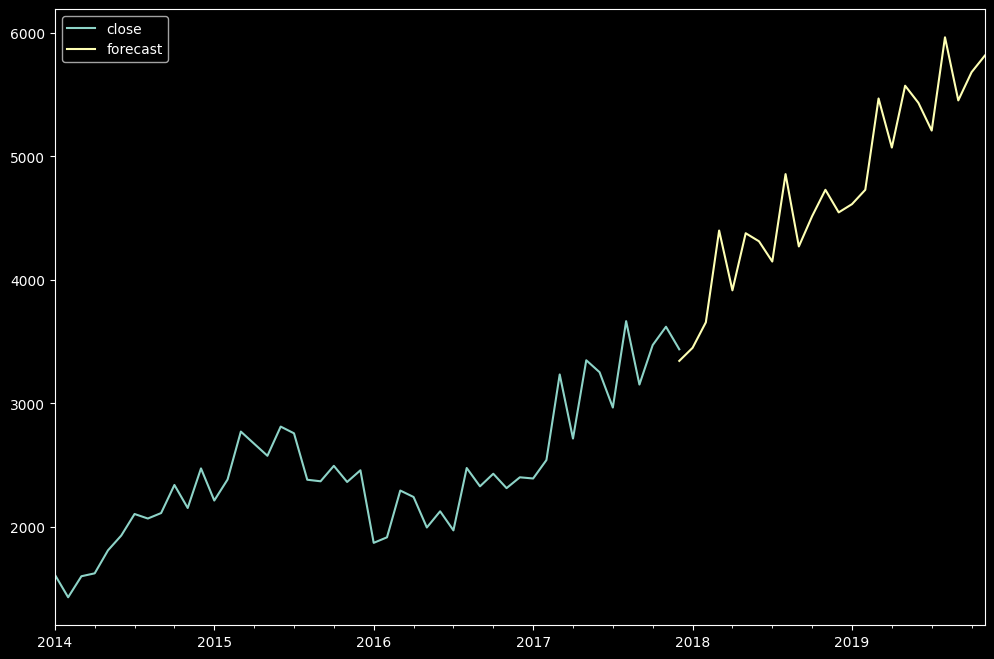

In [52]:
# Using a dark style for the plot background
plt.style.use('dark_background')

# ploting the forecast
future_df['forecast'] = results.predict(start= 47,end= 70, dynamic= True)
future_df[['close','forecast']].plot(figsize= (12,8))

# Display the plot
plt.show()

In [51]:
future_df

,close,First_differencing,forecast
2014-01-31,1612.3354,NaN,NaN
2014-02-28,1429.2871,-183.0483,NaN
2014-03-31,1599.6414,170.3543,NaN
2014-04-30,1623.2211,23.5797,NaN
2014-05-31,1809.5858,186.3647,NaN
...,...,...,...
2019-07-31,NaN,NaN,5209.343636
2019-08-31,NaN,NaN,5965.026664
2019-09-30,NaN,NaN,5453.791151
2019-10-31,NaN,NaN,5681.922912
